# GRIP @The Sparks Foundation Internship 
# Author : Gouri Zade
## Data Science and Business Analytics Intern
### Task 1 : Prediction using Supervised Machine Learning

In this task, I will be examining the relationship between the number of study hours and the percentage of students. The goal is to build a linear regression model that can accurately predict the percentage of students based on the number of hours they study.

# Import the Libraries

In [ ]:
### Data Analysis & Calculation ###
import pandas as pd
import numpy as np

### Data Visualization ###
import matplotlib.pyplot as plt
import seaborn as sns

### model Building and evaluation  ###
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [ ]:
# importing data 
data = pd.read_csv('/content/drive/MyDrive/The Sparks Foundation Internship/Task 1 = Supervised ML/student scores.csv')

In [ ]:
# display the first 5 rows
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Data Analysis

* **Data Type Info**



In [ ]:
# Checking datatypes of features
data.dtypes

Hours     float64
Scores      int64
dtype: object

* **Data Shape**

In [ ]:
data.shape # 25 rows  # 2 columns

(25, 2)

* **Missing Values**

In [ ]:
# Checking missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

* **Univariate analysis**

In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


* **Identify and Treatment of Outliers**

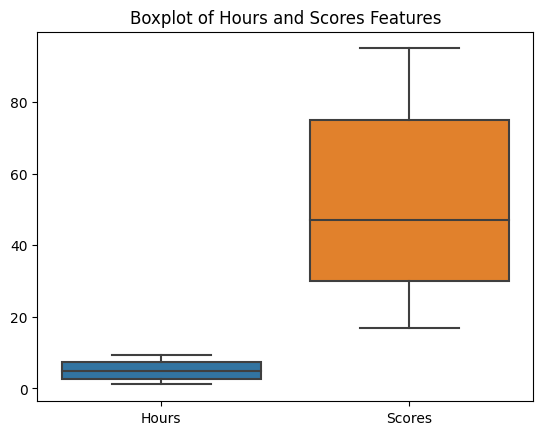

In [ ]:
sns.boxplot(data = data)
plt.title('Boxplot of Hours and Scores Features')
plt.show()

   * No outliers are present 

* **Correlation**

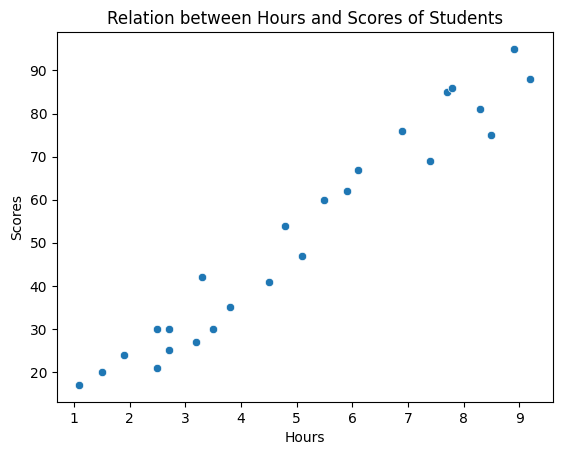

In [ ]:
# Check the correlation direction 
sns.scatterplot(x = 'Hours', y = 'Scores', data = data)
plt.title('Relation between Hours and Scores of Students')
plt.show()

  * From the above sctterplot it shows that there is positive Relation between 'Hours' and 'Scores'.

* **Correlation Matrix**

In [ ]:
data.corr() # 97% Strong Correaltion exists

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Data Partition

In [ ]:
# import train test split
from sklearn.model_selection import train_test_split

# differentiate independent and target features
X = data.drop(['Scores'], axis = 1)
y = data['Scores']

# Splitting the data into train and test sets to use in models
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size= 0.7 , random_state= 189)

# Linear Regression Model Building

In [ ]:
# apply linear regression 
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

* **Prediction on train data**

In [ ]:
# Train data
y_train_pred = regression.predict(X_train)

* **Prediction on test data**

In [ ]:
# Test data
y_test_pred = regression.predict(X_test)

# Model Evaluation

* **Accuracy on Train Data**

In [ ]:
# train data
r_sq = r2_score(y_train, y_train_pred)
r_sq

0.9504228691397381

* **Accuracy on Test Data**

In [ ]:
# test data
r_sq = r2_score(y_test, y_test_pred)
r_sq

0.9384963377270229

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_test_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('R-2:', metrics.r2_score(y_test, y_test_pred))

Mean Absolute Error: 4.863086408307058
Mean Squared Error: 27.96782942391332
Root Mean Squared Error: 5.288461914764379
R-2: 0.9384963377270229


## Visualising the Test set results

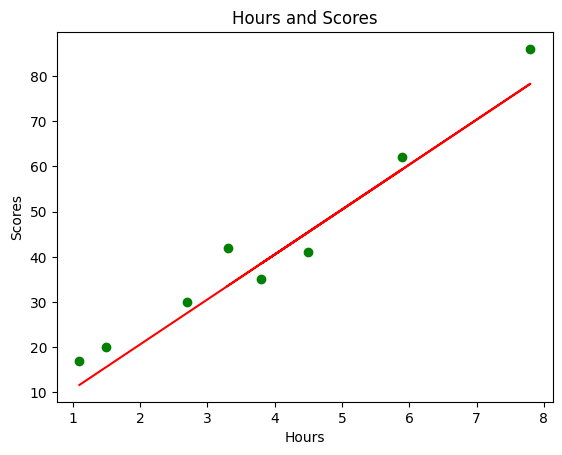

In [ ]:
plt.scatter(x=X_test, y = y_test, color = 'green')
plt.plot(X_test, regression.predict(X_test), color = 'red' ) # to plot regression line
plt.title('Hours and Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

## Getting Final Regression Equation

In [ ]:
print("regression coeficient : ",  regression.coef_)
print("regression intercept : ",  regression.intercept_)

regression coeficient :  [9.94587892]
regression intercept :  0.7132509734841719


* **Eqaution**

    Y = 9.946 + 0.713 * Hours 

## Making Live Prediction

* **What will be the predicted score if a student studies for 9.25hr/day ?**

In [ ]:
print('the score of a student will be : ', regression.predict([[9.25]]))

the score of a student will be :  [92.71263096]
